In [ ]:
import sys, os, re
sys.path.append(r"/awlab/users/chsu/WorkSpace/tensorflow/neuron/code")
# sys.path.append(r"D:\USERS\Han-Hsuan\neuron\code")

import pandas as pd
import matplotlib.pyplot as plt

import analyze_results

In [ ]:
df = analyze_results.main(save_csv=False)

# Add metadata from file name

In [ ]:
pattern = re.compile('(?P<type>(Adults|Larvae)).*\.png$')
metadata = [pattern.search(f).groupdict() for f in df['file_name']]

df = pd.concat([df, pd.DataFrame(metadata)], axis=1)
df.head()

# Visualization

In [ ]:
%matplotlib notebook

x_val = 'dice_loss_AL'
y_val = 'dice_loss_deep'
clr_key = 'type'


clr_grp = df[clr_key].astype('category').cat.categories
clr_idx = df[clr_key].astype('category').cat.codes

ax = df.plot.scatter(x=x_val, y=y_val, style='.', alpha=0.5,
                     c=clr_idx, vmin=-0.5, vmax=len(clr_grp)-0.5,
                     cmap=plt.cm.get_cmap("jet", len(clr_grp)),
                     figsize=(9,6))
fig = ax.get_figure()
line = ax.collections[0]

annot = ax.annotate("", xy=(0,0), xytext=(-20,10), textcoords="offset points",
                    bbox=dict(boxstyle="round", fc="w"), arrowprops=dict(arrowstyle="->"), zorder=100)
annot.set_visible(False)

def update_annot(ind):
    idx = ind["ind"][0]
    
    # for scatter
    pos = line.get_offsets()
    annot.xy = pos[idx]
    
    file_name = df.loc[idx,'file_name']
    area = df.loc[idx,'area_true']
    x = df.loc[idx,x_val]
    y = df.loc[idx,y_val]
    text = "{}\nArea: {area:d}\n{x_val:}: {x:.2f}\n{y_val:}: {y:.2f}".format(
        file_name, area=int(area), x_val=x_val, x=x, y_val=y_val, y=y)

    annot.set_text(text)
    annot.get_bbox_patch().set_alpha(1)


def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = line.contains(event)
        if cont:
            update_annot(ind)
            annot.set_visible(True)
            fig.canvas.draw_idle()
        else:
            if vis:
                annot.set_visible(False)
                fig.canvas.draw_idle()

fig.canvas.mpl_connect("motion_notify_event", hover)

# set colorbar
cb_ax = fig.axes[1]
cb_ax.yaxis.set_ticks(range(len(clr_grp)))
cb_ax.set_yticklabels(clr_grp)
cb_ax.set_ylabel(clr_key, rotation=270, verticalalignment='baseline')
cb_ax.zorder = -1

# Overlay diagnal for comparing dice loss
if 'dice_loss' in x_val and 'dice_loss' in y_val:
    ax.plot([0, 1], [0, 1], 'k--', zorder=-1)

plt.show()


# Test ground

In [9]:
import os, cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
exp_name = 'adults_larvae'
root_path = r'/awlab/users/chsu/WorkSpace/tensorflow/neuron'

data_root = os.path.join(root_path, 'data')
result_root = os.path.join(root_path, 'results')
img_dir = os.path.join(data_root, exp_name)

fname = '1_CEO_Larvae.png'
img_file = os.path.join(img_dir, 'images', fname)
mask_file = os.path.join(img_dir, 'masks', fname)
pred_file = os.path.join(result_root, 'A_uw',exp_name, 'predictions', fname)

In [ ]:
print(pred_file)

In [4]:
I = cv2.imread(img_file)
M = cv2.imread(mask_file)[...,0]
M_pred = np.uint8(((cv2.imread(pred_file)[...,0] / 255.) > 0.5) * 255)

In [5]:
print(I.shape, M.shape, M_pred.shape)

(1024, 1024, 3) (1024, 1024) (1024, 1024)


In [6]:
def gray2color(I, clr=(255, 0, 0)):
    clr = np.array(clr).reshape((1,1,3)) / 255.
    I = I/ 255.
    
    if I.ndim==2:
        I = np.expand_dims(I, axis=2)
    return np.uint8(I * clr * 255)

In [7]:
Mc = gray2color(M, clr=(0,255,0))
M_predc = gray2color(M_pred, clr=(255,0,0))

In [ ]:
# plt.figure(figsize=(16,14))
plt.subplot(1,3,1)
plt.imshow(I)

plt.subplot(1,3,2)
plt.imshow(Mc)

plt.subplot(1,3,3)
plt.imshow(M_predc)

(1024, 1024, 3) uint8


<IPython.core.display.Javascript object>


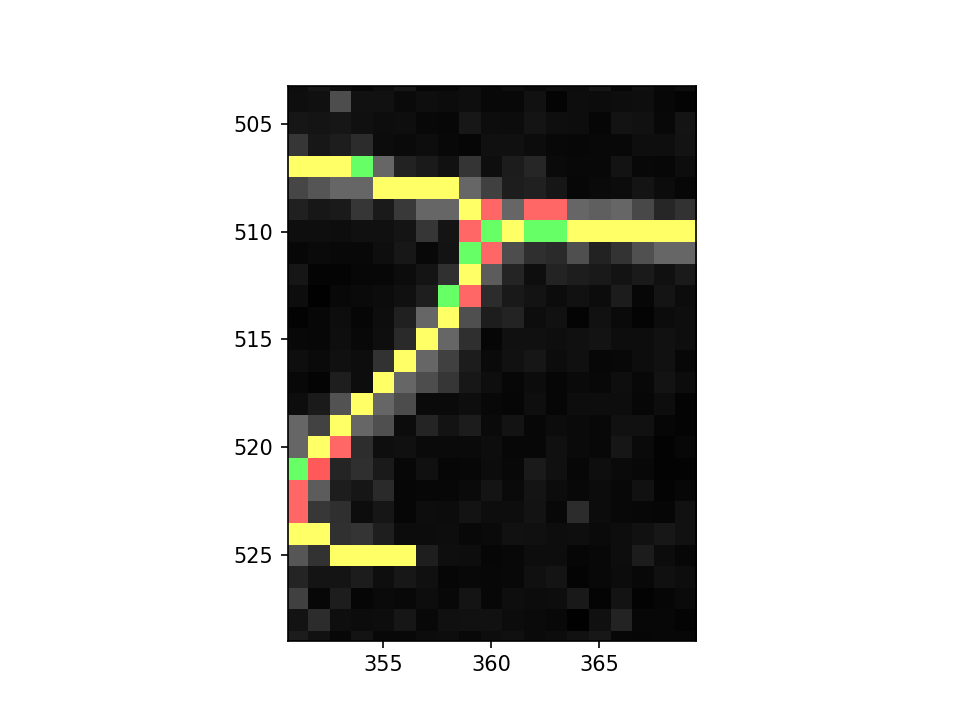

In [16]:
%matplotlib notebook

I2 = cv2.addWeighted(cv2.addWeighted(I, 0.4, Mc, 1, 0), 1, M_predc, 1, 0)
print(I2.shape, I2.dtype)
plt.imshow(I2)

In [ ]:
area_rng = (df['area'] > 200000) & (df['area'] < 300000)
dl_rng = df['dice_loss'] > 0.35
to_check = area_rng & dl_rng

df_check = df[to_check].copy().reset_index(drop=True)
df_check.head()

In [ ]:
def show_overlay(f):
    img = cv2.imread(f)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(12,16))
    plt.imshow(img)
    plt.title(os.path.basename(f))

In [ ]:
%matplotlib notebook
show_overlay(df_check.loc[0,'file'])

In [ ]:
df.hist('dice_loss')

In [ ]:
%matplotlib inline
f = df.loc[0, 'file']
img = cv2.imread(f)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12,16))
plt.imshow(img)
plt.title(os.path.basename(f))

In [ ]:
img = np.random.rand(1000,1000)*255.
print(img.shape)
cv2.imwrite('test.png', np.uint8(img))